In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_mice = pd.merge(mouse_metadata, study_results, how='outer')

# Clean up Age_months
combine_mice = combine_mice.rename(columns={"Age_months":"Age (months)"})

# Display the data table for view
combine_mice.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
mice = combine_mice['Mouse ID'].value_counts()
mice_number = len(mice)
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = combine_mice.loc[combine_mice.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse_id = pd.DataFrame(mice_dup)
dup_mouse_id

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
correct_df = combine_mice[combine_mice['Mouse ID'].isin(mice_dup)==False]
correct_df

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
 # Checking the number of mice in the clean DataFrame.
correct_mice = correct_df["Mouse ID"].unique()
clean_mice = len(correct_mice)
clean_mice

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = correct_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_mean

tumor_median = correct_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_median

tumor_variance = correct_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_variance

tumor_stddev = correct_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_stddev
                                                          
tumor_sem = correct_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
tumor_sem

# Assemble the resulting series into a single summary dataframe.
tumor_regimen = pd.DataFrame({
    "Volume Mean": tumor_mean,
    "Volume Median": tumor_median,
    "Volume Variance": tumor_variance,
    "Volume Standard Deviation": tumor_stddev
#    "Volume SEM": tumor_sem
})

tumor_regimen

,Volume Mean,Volume Median,Volume Variance,Volume Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_group = correct_df.groupby('Drug Regimen')
summary_table = summary_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


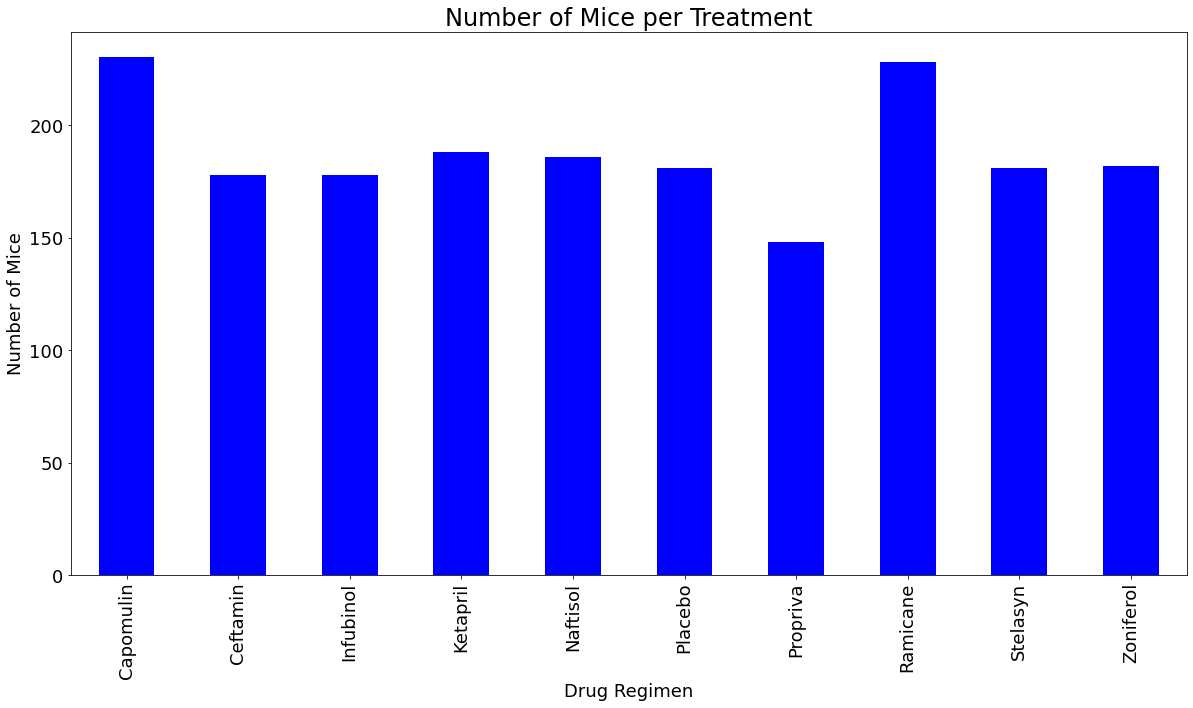

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_treatment = correct_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_treatment = mice_treatment.plot.bar(figsize=(20,10), color='b', fontsize = 18)
mice_treatment
plt.xlabel("Drug Regimen", fontsize = 18)
plt.ylabel("Number of Mice", fontsize = 18)
plt.title("Number of Mice per Treatment", fontsize = 24)
plt.show()

mice_treatment

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

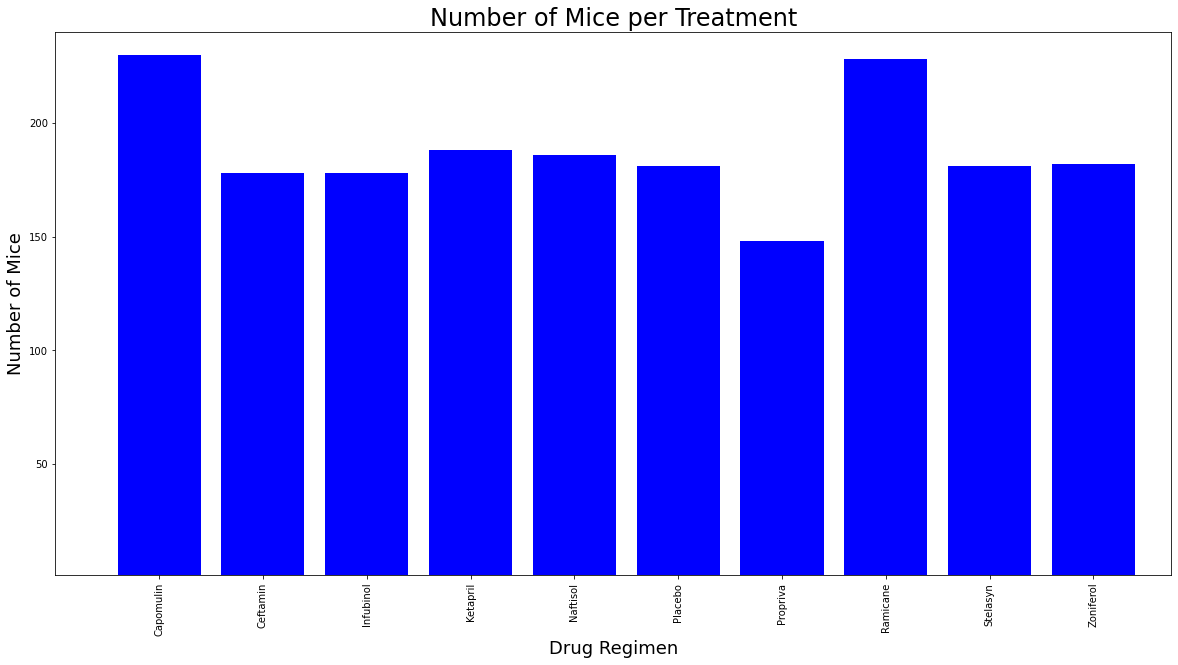

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
mice_list =(correct_df.groupby(["Drug Regimen"])["Mouse ID"].count())

x_axis = np.arange(len(mice_treatment))
fig1, ax1 = plt.subplots(figsize=(20,10))
plt.bar(x_axis, mice_list, color='b', alpha=1, align='center')

tick_location = [value for value in x_axis]

plt.xticks(tick_location, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-1, len(x_axis)-0.25)

plt.ylim(1, max(mice_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 24)
plt.xlabel("Drug Regimen",fontsize = 18)
plt.ylabel("Number of Mice",fontsize = 18)

mice_list

In [11]:
#  Group by gender and get the number to plot
mice_gender = correct_df.groupby(["Mouse ID","Sex"])
mice_gender
gender_df = pd.DataFrame(mice_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"].map("{:.1f}%".format)
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.60%
Male,125,50.40%


C:\Users\geral\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


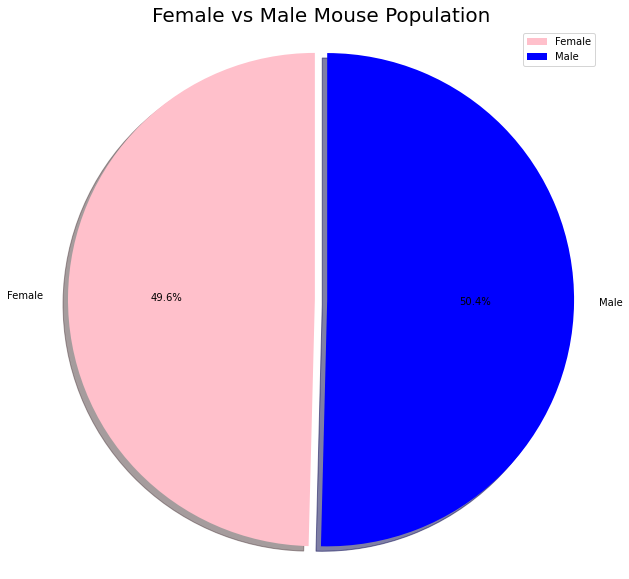

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'blue']
explode = (0, 0.05)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,10), colors = colors, startangle=90, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Female vs Male Mouse Population',fontsize = 20)
plt.ylabel('',fontsize = 24)
plt.axis("equal",fontsize = 24)

plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
